In [ ]:
import pandas_datareader as pdr
import tensorflow as tf
import pandas as pd

### **Loading the Dataset**

In [ ]:
df = pd.read_csv('NSE-TATAGLOBAL.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
# Get the 'Close' values
df_close = df.reset_index()['Close']

In [ ]:
df_close.shape

(2035,)

### **Plot the 'Close' values**

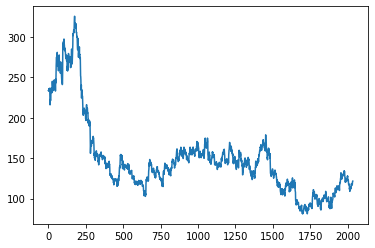

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df_close)

### **Use Scaler**

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1, 1))
df_close.shape

(2035, 1)

### **Training and Testing Data**

In [26]:
# split train & test
train_size = int(len(df_close)*0.65)
test_size = len(df_close) - train_size
train_data, test_data = df_close[0:train_size,:], df_close[train_size:len(df1),:1]

In [32]:
import numpy
# convert values to dataset matrix
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [], []
  for i in range(len(dataset) - time_step - 1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [33]:
time_step=100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [34]:
print(X_train)

[[0.62418301 0.62214052 0.62622549 ... 0.83455882 0.86213235 0.85273693]
 [0.62214052 0.62622549 0.63378268 ... 0.86213235 0.85273693 0.87111928]
 [0.62622549 0.63378268 0.62234477 ... 0.85273693 0.87111928 0.84497549]
 ...
 [0.34517974 0.31781046 0.33047386 ... 0.2816585  0.27001634 0.26531863]
 [0.31781046 0.33047386 0.32128268 ... 0.27001634 0.26531863 0.27389706]
 [0.33047386 0.32128268 0.34007353 ... 0.26531863 0.27389706 0.25347222]]


In [35]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [36]:
print(X_test.shape), print(y_test.shape)

(612, 100)
(612,)


(None, None)

### **Reshape input into 3D format as required for LSTM**

In [37]:
# reshape input to 3D [samples, time steps, features]
# 3D input required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### **Create Stacked LSTM Model**

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [44]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
# compile model
model.compile(loss='mean_squared_error', optimizer='adam')


In [46]:
# view model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
20/20 [==============================] - 12s 286ms/step - loss: 0.0319 - val_loss: 0.0054
Epoch 2/100
20/20 [==============================] - 4s 220ms/step - loss: 0.0031 - val_loss: 9.8749e-04
Epoch 3/100
20/20 [==============================] - 4s 220ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 4/100
20/20 [==============================] - 4s 217ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 5/100
20/20 [==============================] - 4s 215ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 6/100
20/20 [==============================] - 4s 214ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 7/100
20/20 [==============================] - 4s 211ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 8/100
20/20 [==============================] - 4s 215ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 9/100
20/20 [==============================] - 4s 218ms/step - loss: 0.0016 - val_loss: 8.5848e-04
Epoch 10/100
20/20 [==============================] - 4s 214ms/step - loss: 0.0013

### **Prediction & Performance Metrics**

In [49]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [50]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [53]:
import math
from sklearn.metrics import mean_squared_error

# Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

166.02246091533394

In [55]:
# test data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

116.52687747323411

### **Plotting Results**

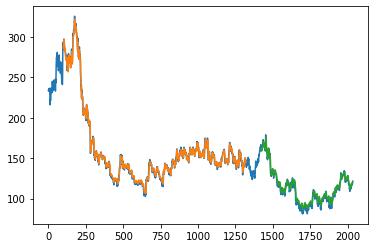

In [56]:
# shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_close)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [58]:
len(test_data)

713

In [59]:
x_input = test_data[613:].reshape(1, -1)
x_input.shape

(1, 100)

In [60]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

### **Prediction for next 30 days**

In [63]:
# demonstrate prediction for next 30 days
from numpy import array

lst_op = []
n_steps = 100
i = 0
while i < 30:
  if(len(temp_input)>100):
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i, x_input))
    x_input = x_input.reshape(1, -1)
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose = 0)
    print("{} day output {}".format(i, yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    lst_op.extend(yhat.tolist())
    i += 1
  else:
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_op.extend(yhat.tolist())
    i += 1
print(lst_op)


[0.16743809]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

In [65]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

### **Plotting Predictions**

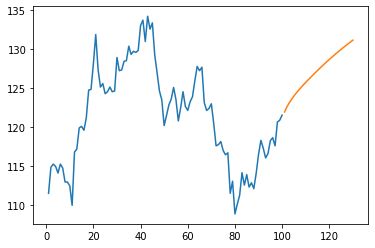

In [86]:
plt.plot(day_new, scaler.inverse_transform(df_close[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_op))